In [148]:

import pyreadr
import numpy as np
result = pyreadr.read_r("SMRi ordered - Brazil")   # também lê .RData
obj = next(iter(result.values()))        # pega o único objeto do .rds

# se for um data frame R, vira um pandas.DataFrame
import pandas as pd
df = obj if isinstance(obj, pd.DataFrame) else None
df

,C349_F,C509_F,C349_M,C509_M,C169_F,C61_M,C539_F,C159_F,C169_M,C189_F,...,C348_F,C259_F,C158_F,C710_F,C910_F,C508_M,C329_F,C229_M,C920_M,C348_M
0,1.123807,0.661231,0.986634,0.707814,1.221911,0.742698,1.529891,0.683831,1.314676,0.483973,...,0.129755,0.741873,0.324420,0.945515,1.155595,0.489597,0.708779,0.997034,1.632688,0.421424
1,0.443441,0.610168,0.448988,1.158253,0.574836,0.669648,1.016424,0.642775,0.857079,1.139936,...,0.686543,0.676663,0.377033,0.404505,0.856310,0.394149,1.116109,0.785896,0.856177,0.488565
2,0.879448,0.449045,0.890769,0.604989,1.166260,0.811681,0.525437,0.498478,0.860090,0.458524,...,1.018784,0.343900,0.199252,0.557964,0.717085,1.581079,0.605687,0.927671,0.976468,0.276429
3,1.020218,0.422304,1.001927,0.662585,0.601234,1.225795,0.519147,0.668390,0.739988,0.385682,...,0.508094,0.407007,0.222651,0.954067,0.589336,0.235744,0.137473,2.151896,0.491282,0.296950
4,0.443073,0.354335,0.906988,0.692725,0.575117,0.642738,0.642628,0.642295,0.661374,0.714549,...,0.998982,0.675574,0.377434,1.038157,0.865526,0.377844,0.417678,0.759698,0.842549,0.472608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.795859,0.878455,0.941837,0.501845,0.541944,0.668475,0.851317,0.613098,0.597926,0.443320,...,0.793249,1.046697,0.670988,1.020633,0.796339,0.500193,0.575162,0.621490,1.009267,0.408773
553,0.736944,0.657660,0.301150,0.686377,0.532942,0.702059,0.835282,0.613446,0.616894,1.295596,...,0.285469,0.243286,0.538304,0.565433,0.770437,0.764510,0.601369,0.813694,0.542717,0.372696
554,0.574846,0.596009,0.625308,0.505195,0.645011,0.514871,0.851198,0.707966,0.449321,0.463246,...,0.368908,0.168814,0.558871,0.578338,0.502741,0.387714,0.233878,0.300325,0.583313,0.472506
555,1.210127,0.824201,0.832557,1.017706,0.747300,1.087854,1.233877,1.062437,0.534971,0.742545,...,0.471792,1.141518,0.258733,0.956117,1.152759,0.457115,0.543120,0.724577,1.129771,0.767634


In [24]:
vars_cols = df.var()   
vars_cols.head()

C349_F    0.674739
C509_F    0.179864
C349_M    0.568566
C509_M    0.175342
C169_F    0.355013
dtype: float64

In [126]:
df_std = df.copy()

#vamos padronizar as colunas 
mu = df_std.mean(axis=0)
sd = df_std.std(axis=0, ddof=0)  # desvio padrão populacional (ddof=0)

# evita divisão por zero (coluna constante). Aqui descartamos constantes.
keep = sd > 0

# Y é o DataFrame padronizado
Y = ((df_std.loc[:, keep] - mu[keep]) / sd[keep]).fillna(0.0)
print(Y.values, Y.shape)
Y.var().head()

[[ 0.36497084 -0.18883623  0.27358684 ...  0.17555823  1.919834
  -0.54308607]
 [-0.46404909 -0.30934677 -0.44008088 ... -0.18922218 -0.1473854
  -0.44313775]
 [ 0.06722115 -0.68960224  0.14633648 ...  0.05572086  0.17285073
  -0.75892984]
 ...
 [-0.30393368 -0.34276097 -0.20603454 ... -1.02813628 -0.87380289
  -0.46704425]
 [ 0.47015061  0.19577766  0.06906562 ... -0.29516127  0.58097297
  -0.02770818]
 [-0.58646782 -0.75816981  0.17664611 ... -0.04401604  1.72514341
  -0.75674525]] (557, 30)


C349_F    1.001799
C509_F    1.001799
C349_M    1.001799
C509_M    1.001799
C169_F    1.001799
dtype: float64

In [26]:
# Agora sim, podemos fazer a SVD
from numpy.linalg import svd

# X = M S Vt
M, S, Vt = svd(Y.values, full_matrices=False)
print(M.shape, S.shape, Vt.shape)  # M:(n×q), S:(q,), Vt:(q×q)

(557, 30) (30,) (30, 30)


In [27]:
for i in S:
    print(f"{i:.3f}", end=" ")

94.025 35.695 28.201 25.718 23.597 22.430 20.122 19.006 17.952 17.604 17.224 15.466 15.254 14.915 13.772 12.911 12.427 11.966 11.567 10.799 10.383 10.152 9.859 9.654 9.094 8.811 8.363 7.878 7.549 5.839 

In [38]:
# Gavish–Donoho para escolher K 
n, q = Y.shape

beta = min(q / n, n / q)
sigma_median = np.median(S)
omega = 0.56*beta**3 - 0.95*beta**2 + 1.82*beta + 1.43
tau = omega * sigma_median
k = np.sum(S >= tau)
print(f"n={n}, q={q}, beta={beta:.3f}, omega={omega:.3f}, tau={tau:.3f}, K={K}")

n=557, q=30, beta=0.054, omega=1.525, tau=20.351, K=6


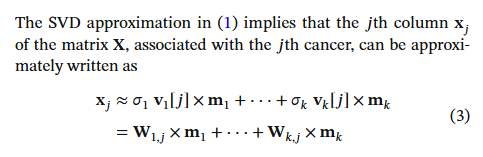
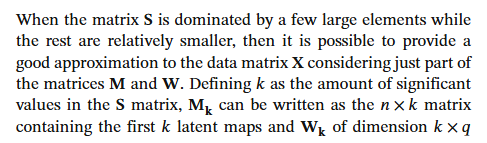
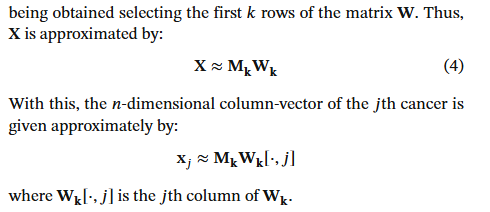

In [ ]:
import numpy as np

def xj_via_sum(M, S, Vt, j, k):
    """
    Implementa x_j ≈ sum_{l=1..k} sigma_l * v_l[j] * m_l
    M: (n x q)   -> colunas m_l
    S: (q,)      -> valores singulares
    Vt: (q x q)  -> V^T
    j: índice 1-based da coluna
    k: posto da aproximação
    """
    x = np.zeros(n, dtype=M.dtype)
    
    for l in range(k):
        coeff = S[l] * Vt[l, j-1] #sigma_l * v_l[j]
        x += coeff * M[:, l]
    return x
     
    

def xj_via_mat(M, S, Vt, j, k):
    """
    Forma matricial: x_j ≈ M_k @ W_k[:, j], com W = S V^T.
    """
    Mk = M[:, :k]                    # (n x k)
    Wk_col_j = S[:k] * Vt[:k, j-1]   # (k,) == [sigma_l * v_l[j]]_{l=1..k}
    return Mk @ Wk_col_j

# --- Exemplo de uso (ajuste k e os índices conforme seu X) ---
k=6
cols = [1, 10, 20, 30]  # 1-based como no artigo

for j in cols:
    x_sum = xj_via_sum(M, S, Vt, j, k)
    x_mat = xj_via_mat(M, S, Vt, j, k)
    assert np.allclose(x_sum, x_mat)
    print(f"x_{j} via sum: {x_sum[:5]} ...")
    print(f"x_{j} via mat: {x_mat[:5]} ...")



x_1 via sum: [ 0.22639466 -0.12476106 -0.2072851   0.12235484 -0.10337673] ...
x_1 via mat: [ 0.22639466 -0.12476106 -0.2072851   0.12235484 -0.10337673] ...
x_10 via sum: [ 0.04123333 -0.23482643 -0.3269082  -0.21295424 -0.237691  ] ...
x_10 via mat: [ 0.04123333 -0.23482643 -0.3269082  -0.21295424 -0.237691  ] ...
x_20 via sum: [ 0.48453218 -0.35525627 -0.41890322 -0.99923011  0.01963938] ...
x_20 via mat: [ 0.48453218 -0.35525627 -0.41890322 -0.99923011  0.01963938] ...
x_30 via sum: [-0.61149713 -0.48139699  0.06270461 -0.23945405 -0.06693494] ...
x_30 via mat: [-0.61149713 -0.48139699  0.06270461 -0.23945405 -0.06693494] ...


In [155]:
#os X_j dos dados são basicamente quando k vale o total de valores singulares, ou seja, quando k = q = 30.
#vamos calcular os X_j para k = 30 e comparar com os X^_j aproximados.

k_full   = len(S)  # posto efetivo retornado pela SVD (<= min(n,q)) #30
k_approx = 6      
cols = [1, 10, 20, 30]  # 1-based como no artigo
for j in cols:
    x_approx = xj_via_mat(M,S,Vt,j,k_approx)
    x_exact = xj_via_mat(M,S,Vt,j,k_full)
    print(f"x_{j} approx (k=6): {x_approx[:5]} ...")
    print(f"x_{j} exact  (k=30): {x_exact[:5]} ...")

    data_col = Y.iloc[:, j-1].to_numpy()
    # verificação do "x_exato" com a coluna dos dados reais #tem que retornar True.
    data_match = np.allclose(x_exact, data_col)
    print(f"exact equals data column? {data_match}\n")



x_1 approx (k=6): [ 0.22639466 -0.12476106 -0.2072851   0.12235484 -0.10337673] ...
x_1 exact  (k=30): [ 0.36497084 -0.46404909  0.06722115  0.23874855 -0.46449772] ...
exact equals data column? True

x_10 approx (k=6): [ 0.04123333 -0.23482643 -0.3269082  -0.21295424 -0.237691  ] ...
x_10 exact  (k=30): [-0.49941167  0.3662299  -0.53299605 -0.62912132 -0.19513286] ...
exact equals data column? True

x_20 approx (k=6): [ 0.48453218 -0.35525627 -0.41890322 -0.99923011  0.01963938] ...
x_20 exact  (k=30): [ 0.19897742  0.01676031  0.00443683 -0.64532072  0.9914579 ] ...
exact equals data column? True

x_30 approx (k=6): [-0.61149713 -0.48139699  0.06270461 -0.23945405 -0.06693494] ...
x_30 exact  (k=30): [-0.54308607 -0.44313775 -0.75892984 -0.72838098 -0.46689166] ...
exact equals data column? True



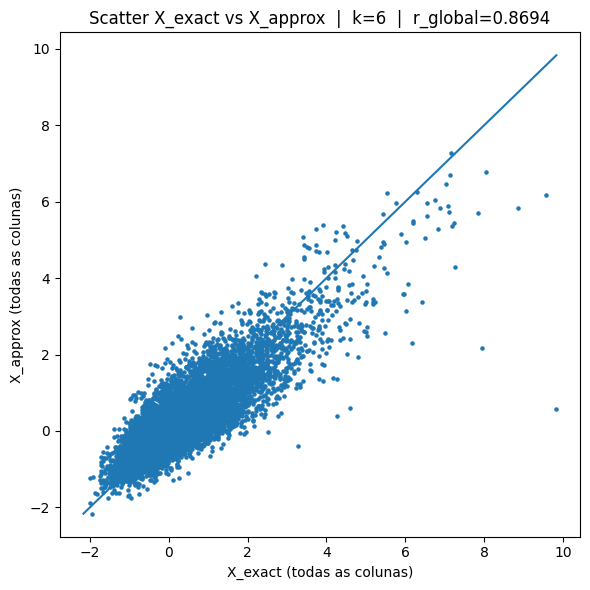

In [ ]:
import matplotlib.pyplot as plt

k_full   = len(S)  # posto efetivo retornado pela SVD (<= min(n,q)) #30
k_approx = 6
per_col_r = {}

cols = np.arange(1,len(S)+1).tolist()

xs_all = []   # exato (eixo X)
ys_all = []   # aprox (eixo Y)

for j in cols:
    
    x_approx = xj_via_mat(M,S,Vt,j,k_approx)
    x_exact = xj_via_mat(M,S,Vt,j,k_full)
    
    xs_all.append(x_exact)
    ys_all.append(x_approx)

    # correlação por coluna
    rj = np.corrcoef(x_exact, x_approx)[0,1] #np.corrcoef retorna a matriz de correlação 2x2 logo [0,1] é o valor que queremos
    per_col_r[j] = rj

# concatena todos os pontos (todas as colunas)
xs_all = np.concatenate(xs_all)
ys_all = np.concatenate(ys_all)

#correlação global (todas os pontos)
r_all = np.corrcoef(xs_all, ys_all)[0,1]

#plot
plt.figure(figsize=(6,6))
plt.scatter(xs_all, ys_all, s=5)

# linha y = x para referência
vmin = float(min(xs_all.min(), ys_all.min()))
vmax = float(max(xs_all.max(), ys_all.max()))

plt.plot([vmin, vmax], [vmin, vmax])        # linha 45°
plt.xlabel("X_exact (todas as colunas)")
plt.ylabel("X_approx (todas as colunas)")
plt.title(f"Scatter X_exact vs X_approx  |  k={k_approx}  |  r_global={r_all:.4f}")
plt.tight_layout()
plt.show()

In [166]:
print("Correlação por coluna (Pearson):")
for j in cols:
    print(f"  j={j:2d}: r = {per_col_r[j]:.4f}")

Correlação por coluna (Pearson):
  j= 1: r = 0.9088
  j= 2: r = 0.8987
  j= 3: r = 0.9312
  j= 4: r = 0.8899
  j= 5: r = 0.9186
  j= 6: r = 0.8664
  j= 7: r = 0.8837
  j= 8: r = 0.8895
  j= 9: r = 0.9068
  j=10: r = 0.8913
  j=11: r = 0.8631
  j=12: r = 0.9179
  j=13: r = 0.8866
  j=14: r = 0.8826
  j=15: r = 0.8257
  j=16: r = 0.8298
  j=17: r = 0.8567
  j=18: r = 0.8805
  j=19: r = 0.8739
  j=20: r = 0.7992
  j=21: r = 0.9051
  j=22: r = 0.8881
  j=23: r = 0.8873
  j=24: r = 0.7682
  j=25: r = 0.8385
  j=26: r = 0.8863
  j=27: r = 0.7070
  j=28: r = 0.8218
  j=29: r = 0.8443
  j=30: r = 0.8977
